In [14]:
# Significance test for antonym score

import numpy as np
from scipy.stats import ttest_rel

# Old scores
old_scores = np.array([0.043, 0.15, 0.088])#, 0.098, 0.14, 0.044, 0.054])
#old_scores = np.array([0.058, 0.21, 0.15, 0.15, 0.16, 0.053, 0.067])

# New score
new_score = 0.252
#new_score = 0.6135

old_scores = old_scores * 100
new_score = new_score * 100

# Perform two-sample t-test
#t_stat, p_value = ttest_ind(old_scores, [new_score])
#print(f"t-statistic: {t_stat:.3f}")
#print(f"p-value: {p_value:.3f}")
ttest_rel(old_scores, [new_score])

ValueError: unequal length arrays

In [7]:
import numpy as np
from scipy.stats import t

# Old scores
old_scores = np.array([0.15, 0.043, 0.088])

# New score
new_score = 0.252

# Calculate mean and standard deviation of old scores
mean_old = np.mean(old_scores)
std_old = np.std(old_scores, ddof=1)

# Calculate t-value for 95% confidence interval with 3 degrees of freedom
t_val = t.ppf(0.975, df=3)

# Calculate confidence interval
ci_low = mean_old - t_val * std_old / np.sqrt(len(old_scores))
ci_high = mean_old + t_val * std_old / np.sqrt(len(old_scores))

print(ci_low, ci_high)
# Check if new score is outside of confidence interval
if new_score < ci_low or new_score > ci_high:
    print("The improvement is significant.")
else:
    print("The improvement is not significant.")

-0.005046185409119941 0.1923795187424533
The improvement is significant.


In [12]:
import numpy as np
from itertools import combinations

# Old scores
#old_scores = np.array([0.043, 0.15, 0.088])#, 0.098, 0.14, 0.044, 0.054])
old_scores = np.array([0.058, 0.21, 0.15, 0.15, 0.16, 0.053, 0.067])

# New score
#new_score = 0.252
new_score = 0.6135
# Concatenate old scores and new score
all_scores = np.concatenate([old_scores, [new_score]])

# Calculate observed difference
obs_diff = np.mean(all_scores[:len(old_scores)]) - new_score

# Permute labels and calculate difference many times
n_perms = 100
null_diffs = []
for i in range(n_perms):
    np.random.shuffle(all_scores)
    null_diff = np.mean(all_scores[:len(old_scores)]) - all_scores[-1]
    null_diffs.append(null_diff)

# Calculate p-value
p_value = sum(null_diffs >= obs_diff) / n_perms
print(p_value)

0.99


In [5]:
import pandas as pd
import pickle

with open("MetricsComparisonMaster\.BLEURT2000_2023-05-10_11-32-10\.dropped_words_results_data.p", 'rb') as f:
    tmp = pickle.load(f)
tmp

,metric,submetric,degree,value
0,BLEURT-Base-128,BLEURT,0.0,0.899346
1,BLEURT-Base-128,BLEURT,0.0,0.906679
2,BLEURT-Base-128,BLEURT,0.0,0.927445
3,BLEURT-Base-128,BLEURT,0.0,0.887990
4,BLEURT-Base-128,BLEURT,0.0,0.866982
...,...,...,...,...
388519,BLEURT-Base-128,BLEURT,1.0,-0.471479
388520,BLEURT-Base-128,BLEURT,1.0,-0.628458
388521,BLEURT-Base-128,BLEURT,1.0,-0.815982
388522,BLEURT-Base-128,BLEURT,1.0,-0.580885


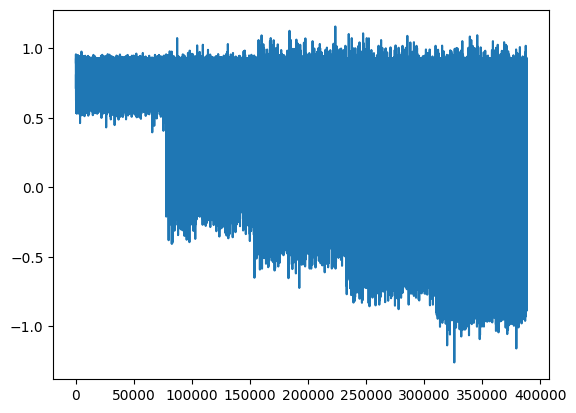

In [8]:
import matplotlib.pyplot as plt

plt.plot(tmp['value'])

In [5]:
import os

os.listdir("mteb_results_p2p")

['AmazonPolarityClassification.json',
 'ArxivClusteringP2P.json',
 'BiorxivClusteringP2P.json',
 'ImdbClassification.json',
 'MedrxivClusteringP2P.json',
 'RedditClusteringP2P.json',
 'StackExchangeClusteringP2P.json',
 'STS22.json',
 'SummEval.json']

In [6]:
classes = {
 'AmazonCounterfactualClassification.json': "Classification",
 'AmazonReviewsClassification.json': "Classification",
 'ArxivClusteringS2S.json': "Clustering",
 'AskUbuntuDupQuestions.json': "Reranking",
 'Banking77Classification.json': "Classification",
 'BiorxivClusteringS2S.json': "Clustering",
 'BIOSSES.json': "STS",
 'EmotionClassification.json': "Classification",
 'MassiveIntentClassification.json': "Classification",
 'MassiveScenarioClassification.json': "Classification",
 'MedrxivClusteringS2S.json': "Clustering",
 'MTOPDomainClassification.json': "Classification",
 'MTOPIntentClassification.json': "Classification",
 'RedditClustering.json': "Clustering",
 'SciDocsRR.json': "Reranking",
 'SICK-R.json': "STS",
 'SprintDuplicateQuestions.json': "PairClassification",
 'StackExchangeClustering.json': "Clustering",
 'StackOverflowDupQuestions.json': "Reranking",
 'STS12.json': "STS",
 'STS13.json': "STS",
 'STS14.json': "STS",
 'STS15.json': "STS",
 'STS16.json': "STS",
 'STS17.json': "STS",
 'STSBenchmark.json': "STS",
 'ToxicConversationsClassification.json': "Classification",
 'TweetSentimentExtractionClassification.json': "Classification",
 'TwentyNewsgroupsClustering.json': "Clustering",
 'TwitterSemEval2015.json': "PairClassification",
 'TwitterURLCorpus.json': "PairClassification",

 # P2P tests
 'AmazonPolarityClassification.json': "Classification",
 'ArxivClusteringP2P.json': "Clustering",
 'BiorxivClusteringP2P.json': "Clustering",
 'ImdbClassification.json': "Classification",
 'MedrxivClusteringP2P.json': "Clustering",
 'RedditClusteringP2P.json': "Clustering",
 'StackExchangeClusteringP2P.json': "Clustering",
 'STS22.json': "STS",
 'SummEval.json': "Summarization"
}

classification = [k for k,v in classes.items() if v =="Classification"] # accuracy on test
pairClassification = [k for k,v in classes.items() if v =="PairClassification"] # accuracy on cos_sim test
clustering = [k for k,v in classes.items() if v =="Clustering"] #v_measure on test
reranking = [k for k,v in classes.items() if v =="Reranking"] # mrr on test
sts = [k for k,v in classes.items() if v =="STS"] # pearson on cos_sim test
summarization = [k for k,v in classes.items() if v =="Summarization"] # pearson on cos_sim test

In [7]:
results = {
 'AmazonCounterfactualClassification.json': 0.7395522388059701,
 'AmazonReviewsClassification.json': 0.41854,
 'ArxivClusteringS2S.json': 0.3791674025811335,
 'AskUbuntuDupQuestions.json': 0.777055577540342,
 'Banking77Classification.json': 0.842305194805195,
 'BiorxivClusteringS2S.json': 0.3344806116771008,
 'BIOSSES.json': 0.6304356600135357,
 'EmotionClassification.json': 0.45975,
 'MassiveIntentClassification.json': 0.7437794216543376,
 'MassiveScenarioClassification.json':  0.7812037659717552,
 'MedrxivClusteringS2S.json': 0.31482609844600595,
 'MTOPDomainClassification.json': 0.933766529867761,
 'MTOPIntentClassification.json': 0.7844961240310079,
 'RedditClustering.json': 0.4430808821775702,
 'SciDocsRR.json': 0.9624795502246483,
 'SICK-R.json': 0.7737646550562759,
 'SprintDuplicateQuestions.json': 0.9943663366336634,
 'StackExchangeClustering.json': 0.49400904310882204,
 'StackOverflowDupQuestions.json': 0.5269727209065443,
 'STS12.json': 0.8181682949075203,
 'STS13.json': 0.8421973736034891,
 'STS14.json': 0.8131407435552415,
 'STS15.json': 0.8408499212851743,
 'STS16.json': 0.8100969277662133,
 'STS17.json': 0.9102586980843879,
 'STSBenchmark.json': 0.842081383253728,
 'ToxicConversationsClassification.json':  0.661514,
 'TweetSentimentExtractionClassification.json': 0.5898981324278438,
 'TwentyNewsgroupsClustering.json': 0.4470279427441454,
 'TwitterSemEval2015.json': 0.8683912499254932,
 'TwitterURLCorpus.json': 0.8808747622928552,

 # P2P tests
 'AmazonPolarityClassification.json': 0.8609557500000001,
 'ArxivClusteringP2P.json': 0.4252841699630186,
 'BiorxivClusteringP2P.json': 0.3369688357037039,
 'ImdbClassification.json': 0.684012,
 'MedrxivClusteringP2P.json': 0.2997059306342652,
 'RedditClusteringP2P.json': 0.4542804471149494,
 'StackExchangeClusteringP2P.json': 0.3014430241515743,
 'STS22.json': 0.5920188409985625,
 'SummEval.json': 0.28095066943386976
}

In [8]:
def calc_mean_res(group):
 res = [results[x] for x in group]
 print(f"Num datasets: {len(res)}")
 print(f"Avg. score {(sum(res)/len(res))}")

print("** Classification")
calc_mean_res(classification)
print("** PairClassification")
calc_mean_res(pairClassification)
print("** Clustering")
calc_mean_res(clustering)
print("** Reranking")
calc_mean_res(reranking)
print("** STS")
calc_mean_res(sts)
print("** Summarization")
calc_mean_res(summarization)

** Classification
Num datasets: 12
Avg. score 0.7083144297969892
** PairClassification
Num datasets: 3
Avg. score 0.914544116284004
** Clustering
Num datasets: 11
Avg. score 0.3845703989365717
** Reranking
Num datasets: 3
Avg. score 0.7555026162238448
** STS
Num datasets: 10
Avg. score 0.7873012498524128
** Summarization
Num datasets: 1
Avg. score 0.28095066943386976


In [9]:
sum(results.values())/len(results.values())

0.6473537727836925